In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet
from keras.losses import categorical_crossentropy

2023-11-29 10:39:48.649788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 10:39:48.695442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 10:39:48.695481: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 10:39:48.695518: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 10:39:48.703385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 10:39:48.704056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

#  Building our Model To train the data 

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/mnt/AA0066EF0066C1C5/FAST/3rd SEMSETER/Programming for AI (LAB)/Project/archive/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/mnt/AA0066EF0066C1C5/FAST/3rd SEMSETER/Programming for AI (LAB)/Project/archive/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 11462 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

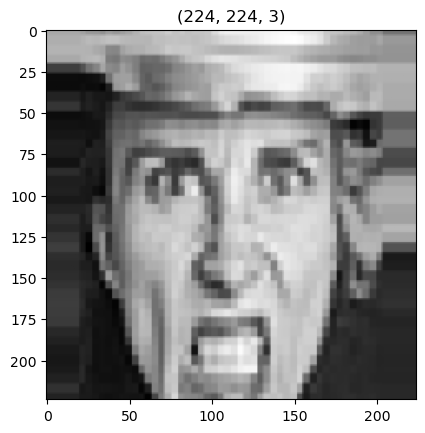

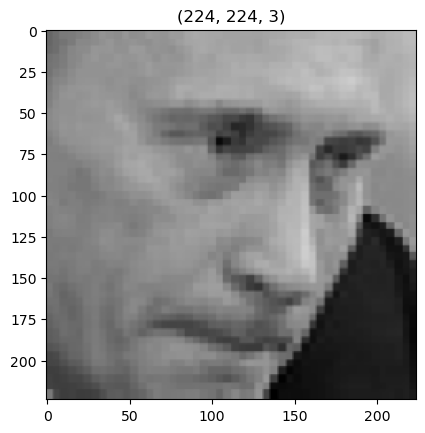

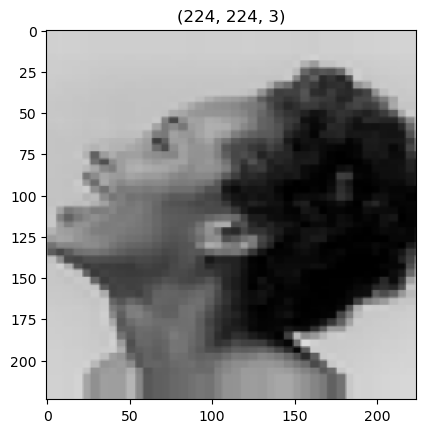

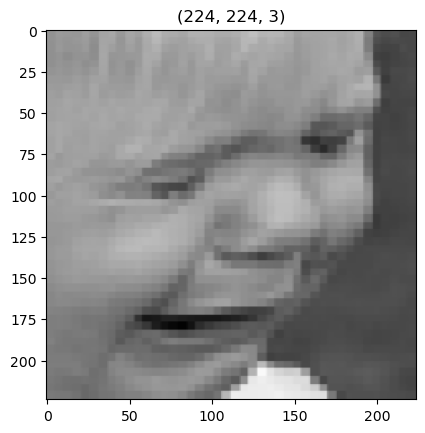

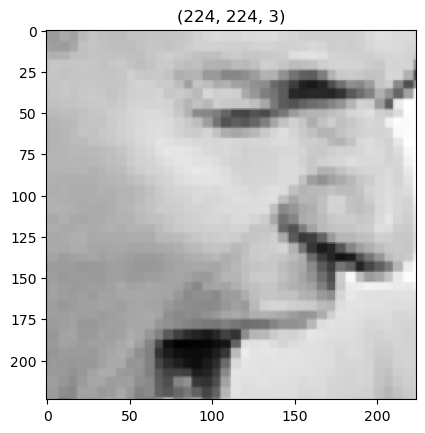

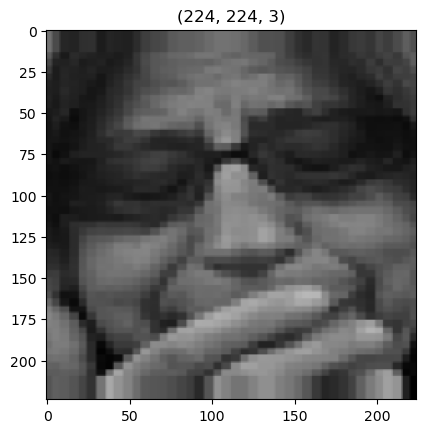

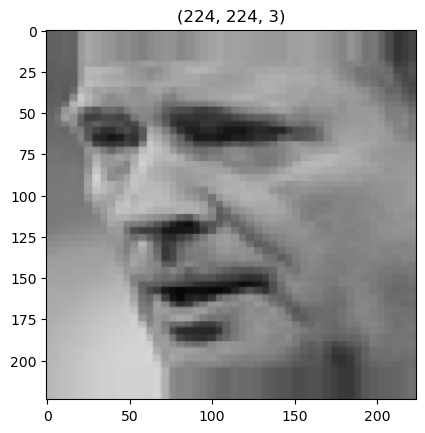

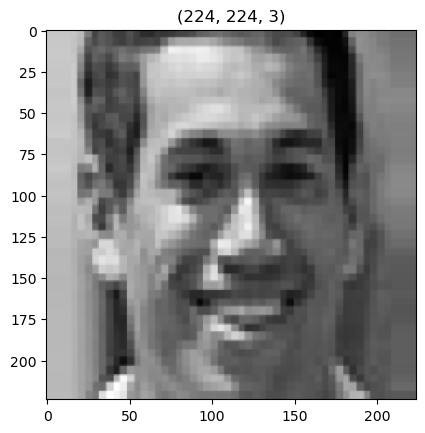

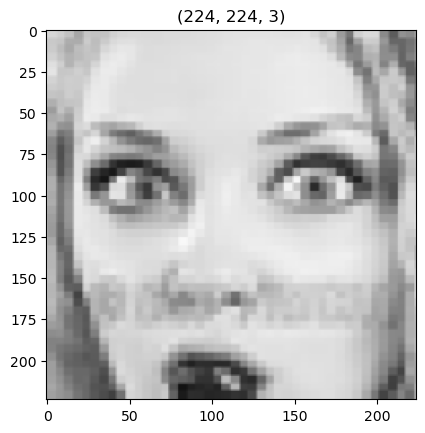

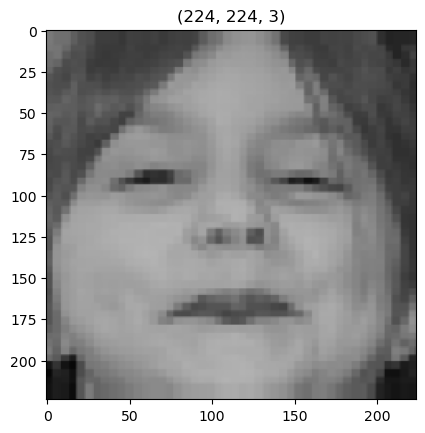

In [6]:
# to visualize the images in the traing data denerator 
t_img , label = train_data.next()
# function when called will plot the images 
def plotImages(img_arr, label):

  # input  :- images array 
  # output :- plots the images 

  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    # print(im)
    # print(l)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 3, verbose= 1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True)

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data, 
                           steps_per_epoch= 20, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 20, 
                           callbacks=call_back)

In [7]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [ ]:
h =  hist.history
h.keys()

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [8]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 911ms/step
 the image is of fearful


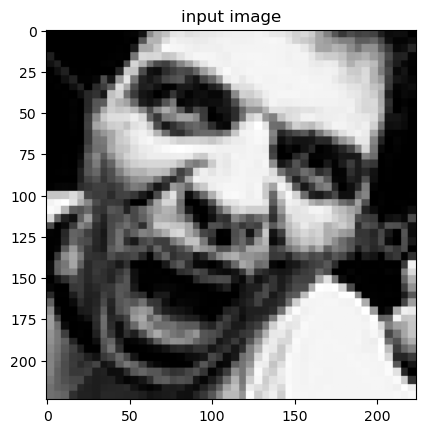

In [9]:
# path for the image to see if it predics correct class

path = "/mnt/AA0066EF0066C1C5/FAST/3rd SEMSETER/Programming for AI (LAB)/Project/archive/t/im27.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()